In [1]:
%matplotlib inline
import pandas as pd
import sklearn as skl
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
hr_df = pd.read_csv('./data/hr_dataset.csv')
hr_df.head()

,Satisfaction_Level,Num_Projects,Time_Spent,Num_Promotions
0,0.30,1,253,2
1,0.25,1,200,0
2,0.90,4,2880,5
3,0.65,3,1450,3
4,0.50,2,785,2


In [3]:
scaler = StandardScaler()
scaler.fit(hr_df)
scaled_data = scaler.transform(hr_df)

In [4]:
scaled_hr_df = pd.DataFrame(scaled_data, columns=hr_df.columns)
scaled_hr_df.head()

,Satisfaction_Level,Num_Projects,Time_Spent,Num_Promotions
0,-1.303615,-1.162476,-1.049481,-0.558656
1,-1.512945,-1.162476,-1.094603,-1.804887
2,1.208335,0.860233,1.187080,1.310692
3,0.161689,0.185996,-0.030385,0.064460
4,-0.466299,-0.488240,-0.596549,-0.558656


In [5]:
X_scaled = scaled_hr_df.copy()
X_scaled = X_scaled.drop(columns='Num_Promotions')

y_scaled = scaled_hr_df.Num_Promotions.ravel()

In [6]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, random_state=3)

In [7]:
nn_model = tf.keras.models.Sequential()

In [8]:
nn_model.add(tf.keras.layers.Dense(units=1, activation='relu', input_dim=3))

In [9]:
nn_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [10]:
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 4         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [11]:
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
fit_model = nn_model.fit(X_train_scaled, y_train_scaled, epochs=300)

Epoch 1/300
1/1 [==============================] - 0s 472ms/step - loss: 1.1663 - accuracy: 0.0000e+00
Epoch 2/300
1/1 [==============================] - 0s 6ms/step - loss: 1.1635 - accuracy: 0.0000e+00
Epoch 3/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1608 - accuracy: 0.0000e+00
Epoch 4/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1580 - accuracy: 0.0000e+00
Epoch 5/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1553 - accuracy: 0.0000e+00
Epoch 6/300
1/1 [==============================] - 0s 3ms/step - loss: 1.1526 - accuracy: 0.0000e+00
Epoch 7/300
1/1 [==============================] - 0s 3ms/step - loss: 1.1498 - accuracy: 0.0000e+00
Epoch 8/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1471 - accuracy: 0.0000e+00
Epoch 9/300
1/1 [==============================] - 0s 7ms/step - loss: 1.1444 - accuracy: 0.0000e+00
Epoch 10/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1417 - accuracy

In [13]:
def get_accuracy_loss(model):
    model_df = pd.DataFrame(model.history, index=range(1,len(model.history['loss'])+1))

    plt.subplots()
    plt.plot(model_df, label=['loss','accuracy'])
    plt.legend()
    plt.title('Neural Network Model Loss and Accuracy')
    plt.show()
    return model_df

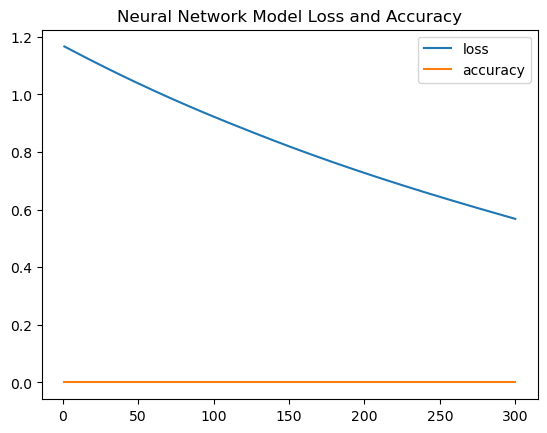

In [14]:
model_df = get_accuracy_loss(fit_model)